# I. Understand the data

### 1. What does the data comprised of?

In [7]:
import numpy as np
import pandas as pd
import os

top = os.getcwd()
print(top)

for dirname, _, filenames in os.walk(top):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/Users/anphong/Documents/School/DataVis/Project/Lab01
/Users/anphong/Documents/School/DataVis/Project/Lab01/titanic.ipynb
/Users/anphong/Documents/School/DataVis/Project/Lab01/Data/test.csv
/Users/anphong/Documents/School/DataVis/Project/Lab01/Data/train.csv
/Users/anphong/Documents/School/DataVis/Project/Lab01/Data/gender_submission.csv


### 2. Read the first 5 line of each data file

In [8]:
#View the train data
train_data = pd.read_csv(top+ "/Data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
#View the test data
test_data = pd.read_csv(top+"/Data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 3. How many row and column the train data have?

In [15]:
shape = train_data.shape
print(f"Current shape: {shape}")

Current shape: (891, 12)


In [13]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of women who survived:", rate_women)
print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


In [14]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


# II. Does the attribute proportion change between the dataset of all passenger and the survivor?

### 1. First we consider the statistic about the surviving rate

In [36]:
total_pass = len(train_data)
print("Total number of passenger onboard is: ", total_pass)

Total number of passenger onboard is:  891


/var/folders/0f/f00gz65n4nz9tczdp4hkdzbm0000gn/T/ipykernel_2201/2692114704.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=train_data,x='Survived',palette=colors,edgecolor='black')
/var/folders/0f/f00gz65n4nz9tczdp4hkdzbm0000gn/T/ipykernel_2201/2692114704.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Did not survived', 'Survived'])


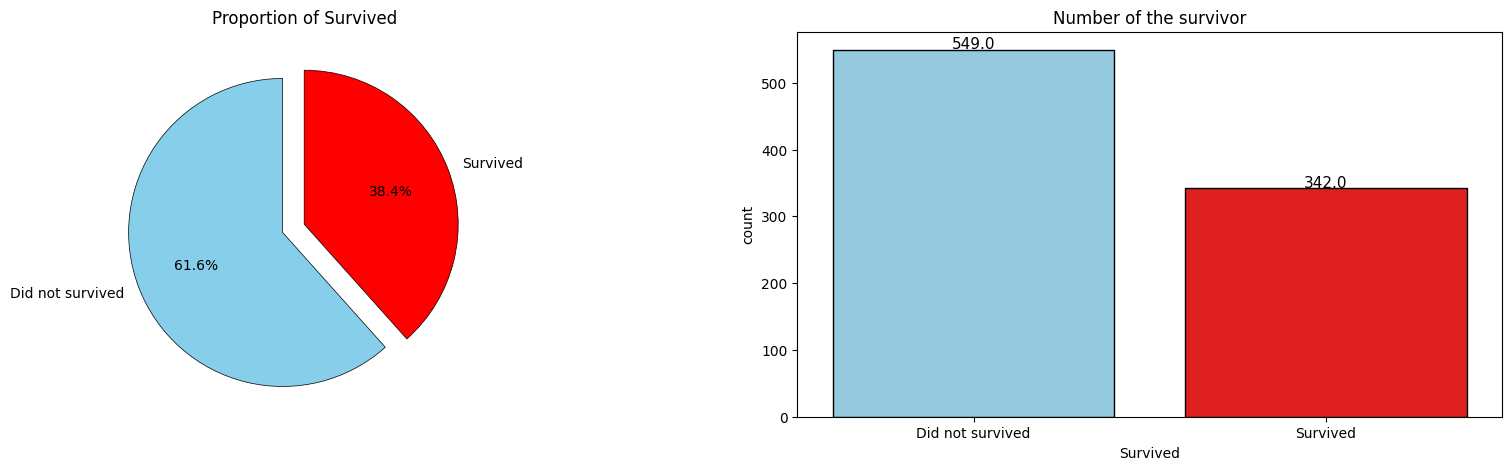

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

cross_tab = train_data['Survived'].value_counts()
proportion = (cross_tab / total_pass * 100).to_numpy()
colors = ['skyblue', 'red']

fig = plt.subplots(nrows=1,ncols=2,figsize=(20,5))

plt.subplot(1,2,1)
plt.pie(proportion,labels=['Did not survived', 'Survived'],autopct='%1.1f%%',startangle=90,explode=(0.15,0),colors=colors,wedgeprops={'edgecolor':'black','linewidth':0.5,'antialiased':True})
plt.title('Proportion of Survived')

plt.subplot(1,2,2)
ax = sns.countplot(data=train_data,x='Survived',palette=colors,edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Did not survived', 'Survived'])
plt.title('Number of the survivor');
plt.show()

### 2. Observe the gender proportion

/var/folders/0f/f00gz65n4nz9tczdp4hkdzbm0000gn/T/ipykernel_2201/2155147688.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  number_of_wm_sv = len(survived_df[train_data['Sex']=='female'])


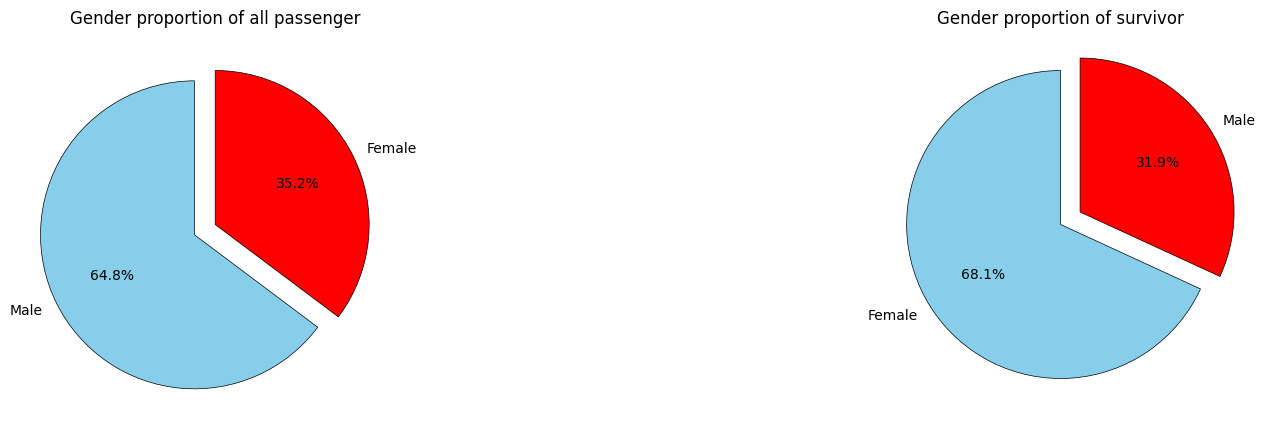

In [85]:
survived_df = train_data[train_data['Survived'] == 1]
total_survivor = len(survived_df)

number_of_women_total = len(train_data[train_data['Sex']=='female'])
number_of_wm_sv = len(survived_df[train_data['Sex']=='female'])

cross_tab = train_data['Sex'].value_counts()
cross_tab_survivor = survived_df['Sex'].value_counts()
proportion_wm_all = (cross_tab / total_pass * 100).to_numpy()
proportion_wm_sv = (cross_tab_survivor / total_survivor * 100).to_numpy()

fig = plt.subplots(nrows=1,ncols=2,figsize=(20,5))

plt.subplot(1,2,1)
plt.pie(proportion_wm_all,labels=['Male', 'Female'],autopct='%1.1f%%',startangle=90,explode=(0.15,0),colors=colors,wedgeprops={'edgecolor':'black','linewidth':0.5,'antialiased':True})
plt.title('Gender proportion of all passenger')

plt.subplot(1,2,2)
plt.pie(proportion_wm_sv,labels=['Female', 'Male'],autopct='%1.1f%%',startangle=90,explode=(0,0.15),colors=colors,wedgeprops={'edgecolor':'black','linewidth':0.5,'antialiased':True})
plt.title('Gender proportion of survivor')

plt.show()

#### We notice a huge transistion of gender proportion at the surviving passenger

### 3. Observe the ticket class proportion

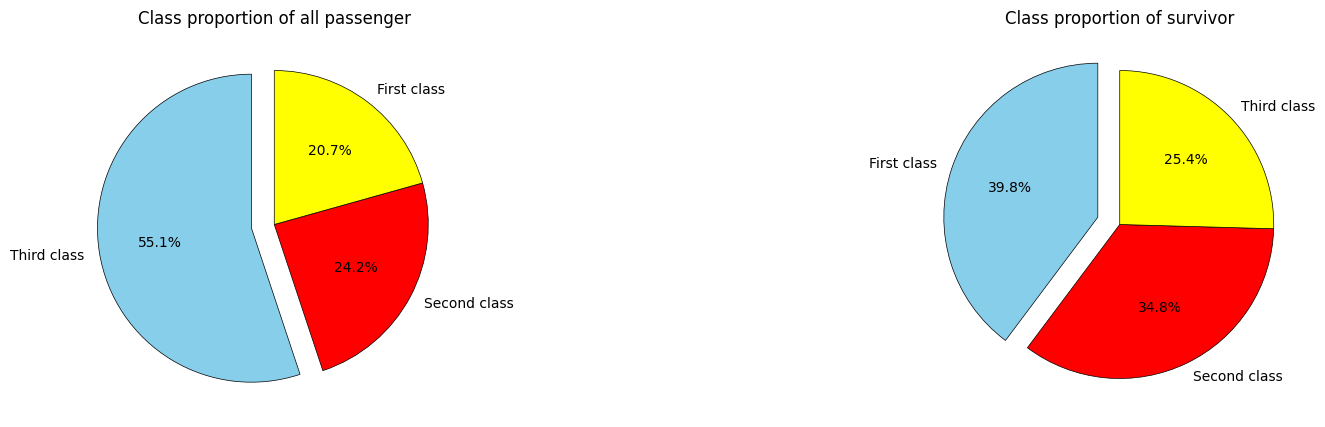

In [88]:
cross_tab = train_data['Pclass'].value_counts()
cross_tab_survivor = survived_df['Pclass'].value_counts()
proportion_class_all = (cross_tab / total_pass * 100).to_numpy()
proportion_class_sv = (cross_tab_survivor / total_survivor * 100).to_numpy()

# print(proportion_class_all)
# print(proportion_class_sv)

class_colors = ['skyblue', 'red', 'yellow']

fig = plt.subplots(nrows=1,ncols=2,figsize=(20,5))

plt.subplot(1,2,1)
plt.pie(proportion_class_all,labels=['Third class', 'Second class', 'First class'],autopct='%1.1f%%',startangle=90,explode=(0.15,0,0),colors=class_colors,wedgeprops={'edgecolor':'black','linewidth':0.5,'antialiased':True})
plt.title('Class proportion of all passenger')

plt.subplot(1,2,2)
plt.pie(proportion_class_sv,labels=['First class', 'Second class', 'Third class'],autopct='%1.1f%%',startangle=90,explode=(0.15,0,0),colors=class_colors,wedgeprops={'edgecolor':'black','linewidth':0.5,'antialiased':True})
plt.title('Class proportion of survivor')

plt.show()

### 4. Observe the age proportion

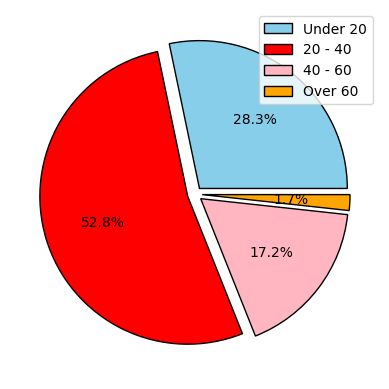

In [89]:
train_data['age_group'] = pd.cut(train_data['Age'], bins=[0, 20, 40, 60, 100],labels=['0-20','20-40','40-60','60-100'])
cross_tab = pd.crosstab(train_data['age_group'],train_data['Survived'])
plt.pie(cross_tab[1], explode=[0.05, 0.05, 0.05, 0.05], 
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True}, colors=["skyblue", "red", "lightpink", "orange"], autopct="%1.1f%%")
plt.legend(['Under 20','20 - 40','40 - 60','Over 60'])
plt.show()

fig = plt.subplots(nrows=1,ncols=2,figsize=(20,5))

plt.subplot(1,2,1)
plt.pie(proportion_class_all,labels=['Third class', 'Second class', 'First class'],autopct='%1.1f%%',startangle=90,explode=(0.15,0,0),colors=class_colors,wedgeprops={'edgecolor':'black','linewidth':0.5,'antialiased':True})
plt.title('Class proportion of all passenger')

plt.subplot(1,2,2)
plt.pie(proportion_class_sv,labels=['First class', 'Second class', 'Third class'],autopct='%1.1f%%',startangle=90,explode=(0.15,0,0),colors=class_colors,wedgeprops={'edgecolor':'black','linewidth':0.5,'antialiased':True})
plt.title('Class proportion of survivor')

plt.show()